# CS-6600 Assignment 2 - Pandas and Matplotlib

*Weber State University*

**Your Name**: Bradon Barfuss


For this assignment we're going to play around with some data visualizations. You'll also need to do a bit of data wrangling to get your data into the right format.

For this assignment, we'll download the popular "Baby Names" dataset from the Social Security Administration. You can find a description of this data [here](https://www.ssa.gov/oact/babynames/limits.html), and download the data as a csv file [here](https://www.kaggle.com/datasets/kaggle/us-baby-names). Please note **you do not need to download it**. You can access it directly from my (Dylan's) Google Drive using the code provided below.

The first thing we'll want to do is import our favorite libraries - Numpy, Pandas, and Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now, let's read in the names data as a Pandas dataframe:

In [2]:
url = 'https://drive.google.com/uc?export=download&id=1OLBPHdnJzmdhDTLR7AA5HVk_8RCaLpsj' #This URL points to the NationalNames.csv file stored on my (Dylan's) Google Drive. You should all be able to access it.

In [3]:
df_names = pd.read_csv(url) #Might take a few moments to download
df_names.head(5)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


The dataset contains names by year, gender, and count from 1880 until 2014. It's a pretty big file.

In [4]:
df_names.shape

(1825433, 5)

Let's take a look at how the name "Dylan" has varied over time:

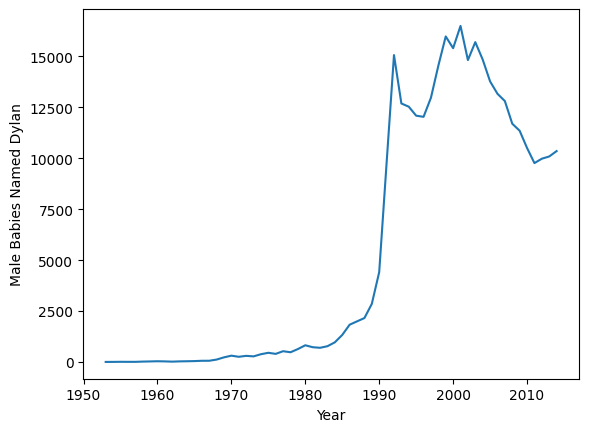

In [5]:
df_dylan = df_names.loc[(df_names['Name'] == 'Dylan') & (df_names['Gender'] == 'M')]

fig, ax = plt.subplots()
ax.plot(df_dylan['Year'], df_dylan['Count'])

ax.set_xlabel('Year')
ax.set_ylabel('Male Babies Named Dylan')
plt.show()

Whoa! It seems like babies named Dylan only started appearing in the United States in the 1950s, and there was a huge increase starting around 1990. My best guess is [this](https://en.wikipedia.org/wiki/Beverly_Hills,_90210) is why.

Let's now take a look at the popularity of the name Patrick.

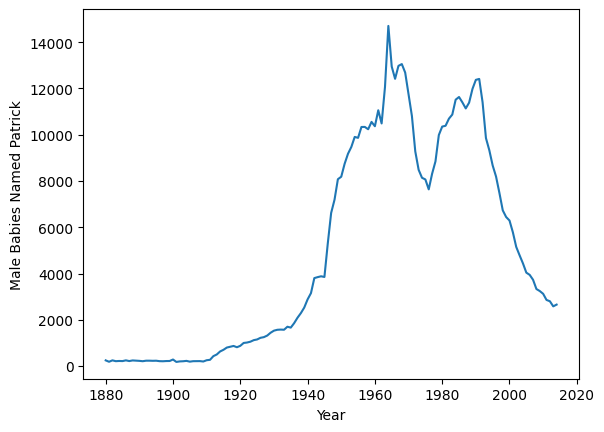

In [6]:
df_patrick = df_names.loc[(df_names['Name'] == 'Patrick') & (df_names['Gender'] == 'M')]

fig, ax = plt.subplots()
ax.plot(df_patrick['Year'], df_patrick['Count'])

ax.set_xlabel('Year')
ax.set_ylabel('Male Babies Named Patrick')
plt.show()

It looks like we've got babies named Patrick as far back as the data goes, and there was a big spike in the 1940s that has come back down considerably since then.

For this assignment, you're going to explore the names data a bit more.

First, add another column in the df_names dataframe that provides the proportion of that name relative to all baby names that year for that gender. So, for example, a proportion of .1 for the name Mary in 1892 would mean that 10% of all female babies were named Mary that year.

In [4]:
# TODO: Add a column 'prop' to the df_names dataframe containing the proportion information described above.
df_names['props'] = df_names['Count'] / df_names.groupby(['Year','Gender'])['Count'].transform('sum')

df_names.info()

#Making sure my ratio are correct
#temp = df_names[['Year','Count','Gender']].groupby(['Year','Gender'])
#print(temp.sum())


#print(df_names.head(20).sort_values(by='props', ascending=False))
df_simba = df_names.loc[(df_names['Name'] == 'Simba') & (df_names['Gender'] == 'M')] #from lion king
df_ringo = df_names.loc[(df_names['Name'] == 'Ringo') & (df_names['Gender'] == 'M')] # the beatles

df_ariel = df_names.loc[(df_names['Name'] == 'Ariel') & (df_names['Gender'] == 'F')]

df_elsa = df_names.loc[(df_names['Name'] == 'Elsa') & (df_names['Gender'] == 'F')]




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      int64  
 1   Name    object 
 2   Year    int64  
 3   Gender  object 
 4   Count   int64  
 5   props   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 83.6+ MB


Next, like the spike we saw with "Dylan" around 1990, there are other names associated with, for example, popular movie or TV characters that we might expect to see increase significantly when those characters become popular. You should create a line plot that contains:

* The proportion over time of four names that you'd expect to increase in popularity significantly around a particular event like a popular Disney movie.
* A legend indicating what these four names are.
* Annotations pointing out these increases and providing a quick description as to why. For example "Aladdin Released" might be the annotation that indicates why the name "Jasmine" became much more popular.

Use different colors for the different names, and label the axes of the figure accordingly.

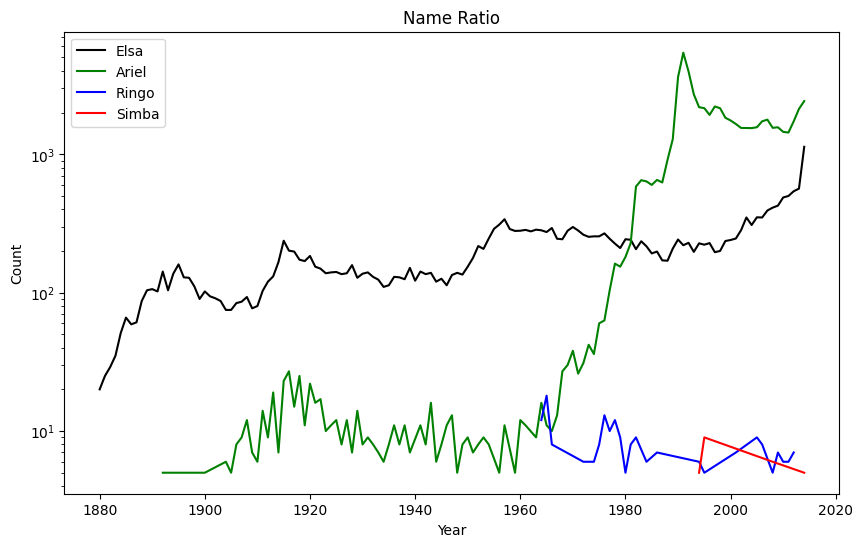

In [5]:
#TODO: Draw the line plots described above.
import matplotlib.scale as mscale
from matplotlib.ticker import FixedLocator, NullFormatter

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title('Name Ratio')

ax.plot(df_elsa['Year'], df_elsa['Count'], label="Elsa", color='black') # frozen
ax.plot(df_ariel['Year'], df_ariel['Count'], label="Ariel",color='green') # the little Mermiade
ax.plot(df_ringo['Year'], df_ringo['Count'], label="Ringo", color='blue') # the Beatles
ax.plot(df_simba['Year'], df_simba['Count'], label="Simba", color='red') #The lion king
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_yscale('log')

ax.legend()

plt.show()

Finally, we're going to investigate whether the most popular men's names tend to be more dominant than the most popular women's names, or vice-versa.

To do this, first create a new dataframe that contains the 10 most popular names each decade by proportion. Here proportion means the percentage of babies born that decade of the given gender with that name. The rows of this dataframe should be:
* Indexed by decade (1880, 1890, 1900, etc...)
* Three columns: Name, Gender, Proportion

Using this dataframe, create a scatterplot where each row is a mark and:

* The horizontal axis represents decade.
* The vertical axis represents proportion.
* The marks are colored to indicate gender.

Provide appropriate titles and legends to make this plot clear. Does it look like the most popular male names tend to be more dominant?

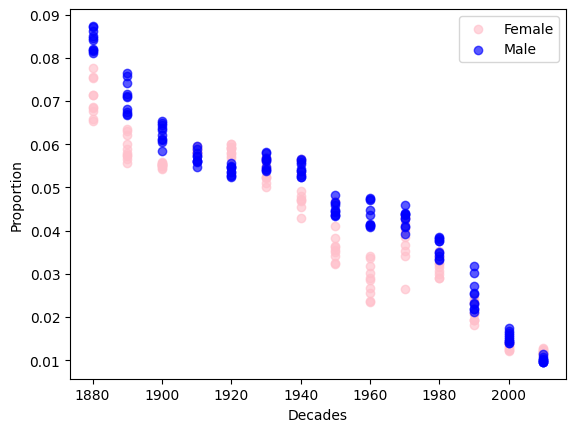

In [17]:
# TODO: Create the figure described above.
#df_names['props'] = df_names['Count'] / df_names.groupby(['Year','Gender'])['Count'].transform('sum')
#temp = df_names[['Year','Count','Gender']].groupby(['Year','Gender'])
#print(temp.sum())

#df_names.info()


df_decade = df_names

df_decade['Decade'] = (df_decade['Year'] // 10) * 10
df_decade = df_decade[['Decade', 'Name', 'Gender','props']].sort_values(by =['Decade','Gender', 'props'], ascending=[True, True, False])
df_decade.set_index('Decade')
df_decade = df_decade.groupby(['Decade', 'Gender']).head(10)
df_female = df_decade[df_decade['Gender'] == 'F']
df_male = df_decade[df_decade['Gender'] == 'M']


fig, ax = plt.subplots()
ax.scatter(df_female['Decade'], df_female['props'], color='pink', label='Female', alpha=0.65)
ax.scatter(df_male['Decade'], df_male['props'], color='blue',label='Male', alpha=0.65)
ax.legend()

ax.set_xlabel('Decades')
ax.set_ylabel('Proportion')
plt.show()

#Does it look like the most popular male names tend to be more dominant?: Yup!

When this is done, please upload your completed notebook to Canvas for grading. Thank you!